In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition, cluster

In [2]:
# Load data to analyze
df = pd.read_csv("./derivatives fs_stats data-cortical_type-aparc_measure-area_hemi-lh.tsv", sep="\t", index_col=0)

In [3]:
# Perform a PCA analysis
pca = decomposition.PCA()
pca.fit(df.values)

PCA()

In [4]:
pca.components_.shape

(37, 37)

In [5]:
# Seek for the best components 
np.round(pca.explained_variance_ratio_*100, 2)

array([9.423e+01, 5.750e+00, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

<Figure size 432x288 with 0 Axes>

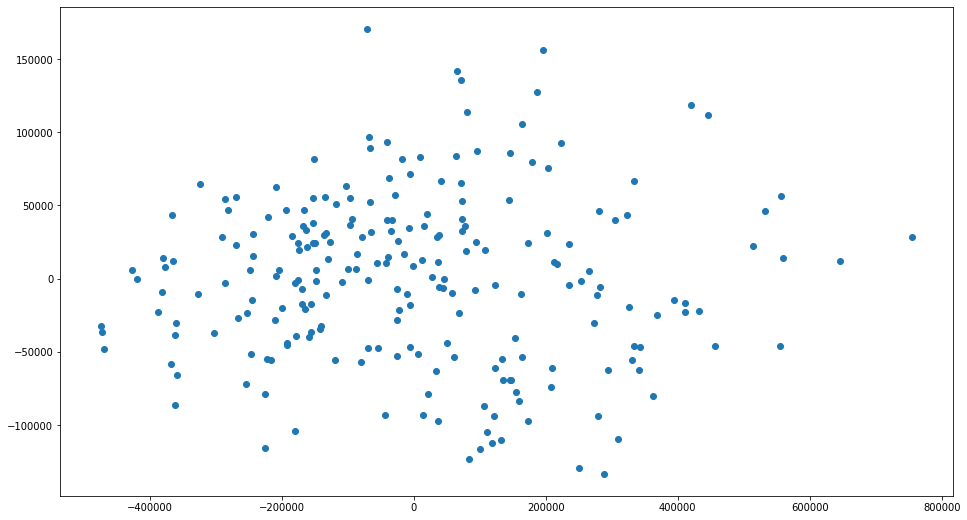

<Figure size 432x288 with 0 Axes>

In [6]:
# Visualize the best components to guess how many clusters it could contain
X = pca.transform(df.values)[:, 0:2]
plt.figure(figsize=(16,9))
plt.scatter(X[:, 0], X[:, 1])
plt.figure()

In [7]:
# Perform clustering
kmeans = cluster.KMeans(n_clusters=3).fit(X)
kmeans

KMeans(n_clusters=3)

In [8]:
# Visualize the cluster centers
kmeans.cluster_centers_

array([[ 351165.28884672,   -8375.65650631],
       [-228950.72762612,   -1908.50581488],
       [  41335.45504087,    5471.66887157]])

<Figure size 432x288 with 0 Axes>

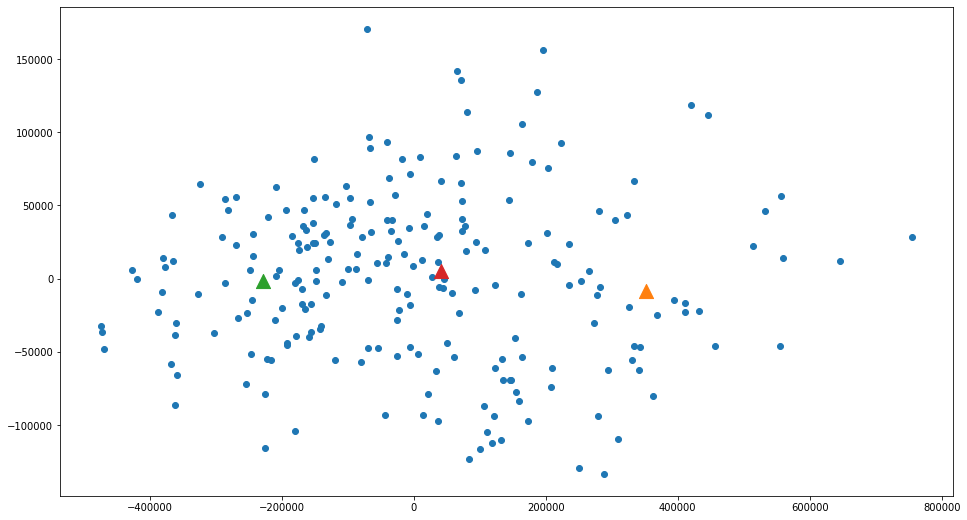

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(16,9))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=200, marker="^")
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=200, marker="^")
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 1], s=200, marker="^")
plt.figure()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  2 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1
  3 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  5 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  5 -1 -1 -1 -1 -1 -1 -1 -1]


<Figure size 432x288 with 0 Axes>

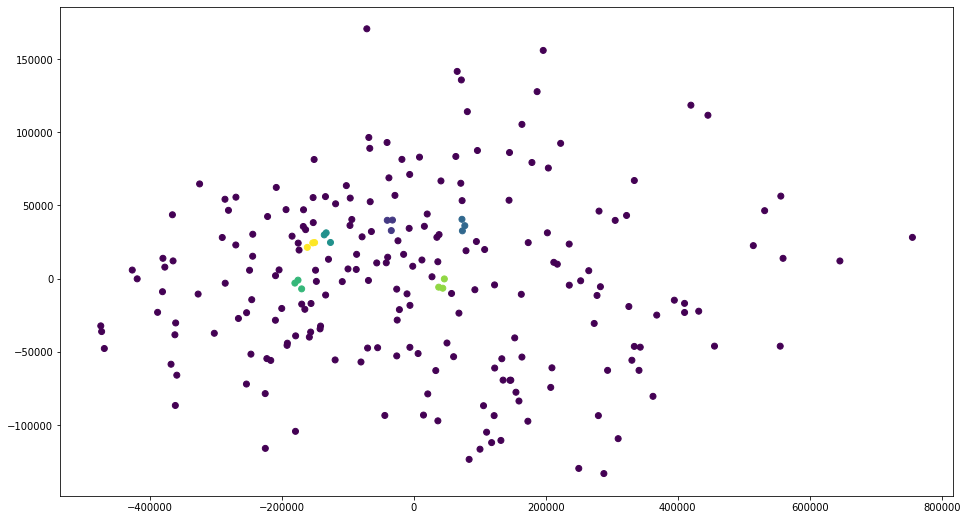

<Figure size 432x288 with 0 Axes>

In [35]:
# Perform a k-Median
clustering = cluster.DBSCAN(eps=10000, min_samples=3).fit(X)
print(clustering.labels_)
# Let's visualize the clusters
plt.figure(figsize=(16,9))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.figure()